In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [3]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
data.columns = ['Total', 'East', 'West']

In [5]:
data.dropna().describe()

,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


Text(0, 0.5, 'Hourly Bicycle Count')

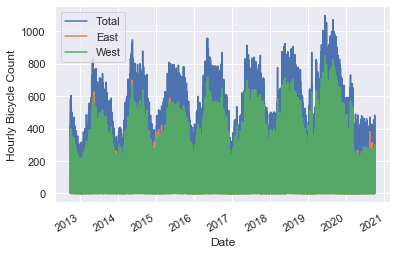

In [6]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly Bicycle Count')

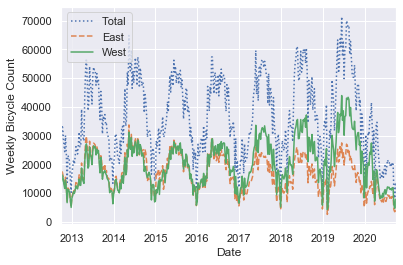

In [7]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count')

Text(0, 0.5, 'Mean of 30 Days Count')

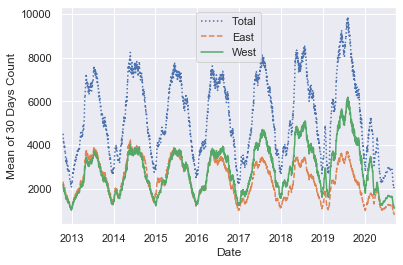

In [8]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('Mean of 30 Days Count')

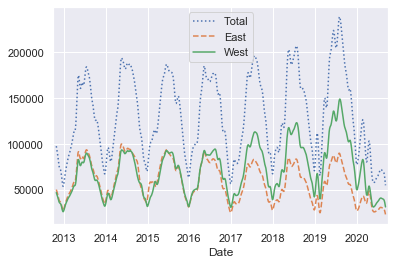

In [9]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

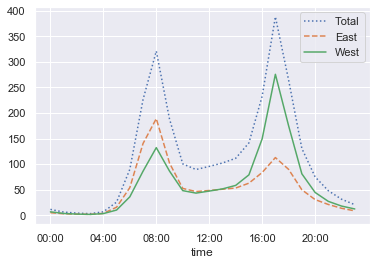

In [10]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

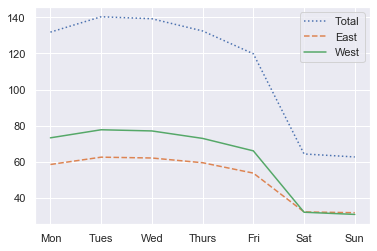

In [11]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [12]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [13]:
by_time

Total        East        West
Weekday 00:00:00    9.431387    4.044346    5.387041
        01:00:00    4.671348    2.100271    2.571077
        02:00:00    3.115792    1.535600    1.580192
        03:00:00    2.678739    1.396403    1.282336
        04:00:00    7.534122    4.177384    3.356738
        05:00:00   32.825326   20.242424   12.582902
        06:00:00  118.766199   72.202020   46.564178
        07:00:00  303.740823  189.646957  114.093865
        08:00:00  425.290712  251.848731  173.441981
        09:00:00  230.423219  125.491250  104.931969
        10:00:00  100.123983   51.877742   48.246241
        11:00:00   76.354449   39.430614   36.923835
        12:00:00   79.368745   39.809712   39.559034
        13:00:00   85.783198   41.937916   43.845282
        14:00:00   97.454411   44.618531   52.835880
        15:00:00  140.250123   58.355101   81.895022
        16:00:00  272.713406   89.993593  182.719813
        17:00:00  499.379004  135.690734  363.688270
        18:00:00  336.076639  108.350665  227.725973
        19:00:00  159.715623   58.151306  101.564317
        20:00:00   88.239280   34.779694   53.459586
        21:00:00   55.176688   23.736570   31.440118
        22:00:00   34.815673   14.800641   20.015032
        23:00:00   21.743223    8.862247   12.880976
Weekend 00:00:00   15.881011    6.611591    9.269420
        01:00:00    9.210234    4.112207    5.098027
        02:00:00    5.975140    2.764450    3.210690
        03:00:00    3.445746    1.724414    1.721332
        04:00:00    3.824908    1.577682    2.247226
        05:00:00    7.348952    3.905672    3.443280
        06:00:00   16.950678    7.974106    8.976572
        07:00:00   32.514797   16.723798   15.790999
        08:00:00   60.160296   31.334155   28.826141
        09:00:00   82.203453   42.819975   39.383477
        10:00:00  100.627004   53.362515   47.264488
        11:00:00  121.654131   63.049322   58.604809
        12:00:00  135.300247   69.376695   65.923551
        13:00:00  142.745993   72.683107   70.062885
        14:00:00  145.797781   74.161529   71.636252
        15:00:00  144.338471   73.170160   71.168311
        16:00:00  132.809494   66.972256   65.837238
        17:00:00  110.530210   55.124538   55.405672
        18:00:00   85.086930   42.601726   42.485203
        19:00:00   57.540074   28.369297   29.170777
        20:00:00   41.590012   19.650432   21.939581
        21:00:00   29.331689   13.649199   15.682491
        22:00:00   21.970407    9.879162   12.091245
        23:00:00   17.257707    7.131319   10.126387

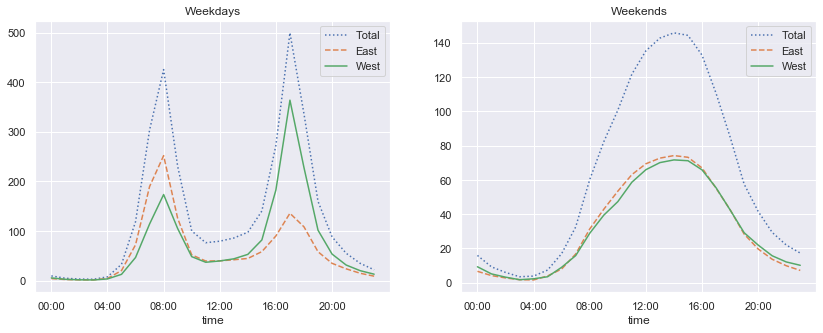

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])